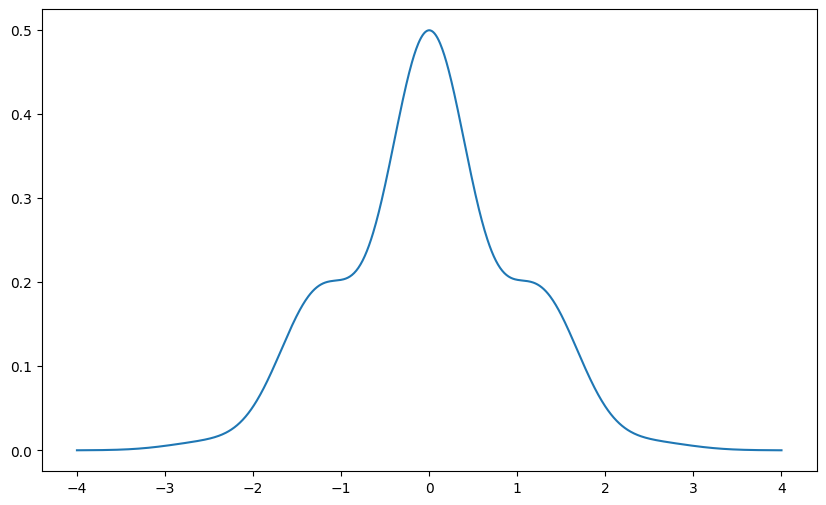

In [12]:
import torch
from utils import * 
d=1
mvn = torch.distributions.MultivariateNormal(torch.zeros(d),torch.eye(d))
target = lambda x: mvn.log_prob(x) + torch.sum(torch.log(torch.ones_like(x) + torch.cos(4*x)/4), dim = -1)
plot_1d_unormalized_function(lambda x: torch.exp(target(x.unsqueeze(-1))),range = (-4,4), bins = 1000)

#target = lambda x: torch.exp(mvn.log_prob(x))
#plot_1d_unormalized_function(lambda x: target(x.unsqueeze(-1)),range = (-4,4), bins = 1000)

100%|██████████████████████████████████████████████████████████████████████████████████████| 100/100 [16:17<00:00,  9.77s/it, DKL latent = 0.072938 DKL observed = 0.027349 ; device: cpu]


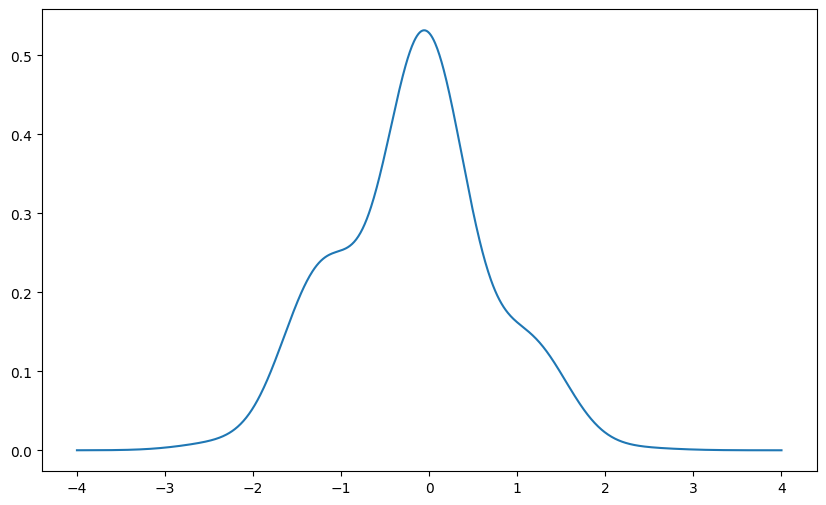

In [16]:
from variational_inference import * 
dif = TMC(target,1, 10, [64,64,64])
dif.T.m.requires_grad = False
dif.T.log_s.requires_grad = False
dif.train(100,10000, lr = 5e-5, verbose = True)
plot_1d_unormalized_function(lambda x: torch.exp(dif.log_prob(x.unsqueeze(-1))),range = (-4,4), bins = 1000)

In [ ]:
dif.train(100,5000, lr = 5e-4, verbose = True)
plot_1d_unormalized_function(lambda x: torch.exp(dif.log_prob(x.unsqueeze(-1))),range = (-4,4), bins = 1000)

In [ ]:
dif.train(100,5000, lr = 5e-5, verbose = True)
plot_1d_unormalized_function(lambda x: torch.exp(dif.log_prob(x.unsqueeze(-1))),range = (-4,4), bins = 1000)